In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
import yfinance as yf
from importlib import reload

# Silencing a Pandas warning about date parsing
import warnings
warnings.filterwarnings("ignore", message="Could not infer format")

pd.set_option('max_colwidth', 400)

In [4]:
stocks = pd.read_csv("trading_data/stocks_cleaned.csv",
                     parse_dates=["Traded", "Filed", "Quarter"])

In [69]:
stocks.head()[["Traded", "Filed", "Quarter"]]

Traded      Filed    Quarter
0 2013-12-18 2014-01-03 2014-01-01
1 2013-12-30 2014-01-07 2014-01-01
2 2013-12-30 2014-01-07 2014-01-01
3 2013-12-30 2014-01-07 2014-01-01
4 2013-12-30 2014-01-07 2014-01-01

In [4]:
test = stocks[stocks.Quarter >= "2023-01-01"]
train = stocks[stocks.Quarter < pd.to_datetime("2023-01-01")]
print(train.shape, test.shape)

(34855, 24) (4694, 24)


## Stock trading over time

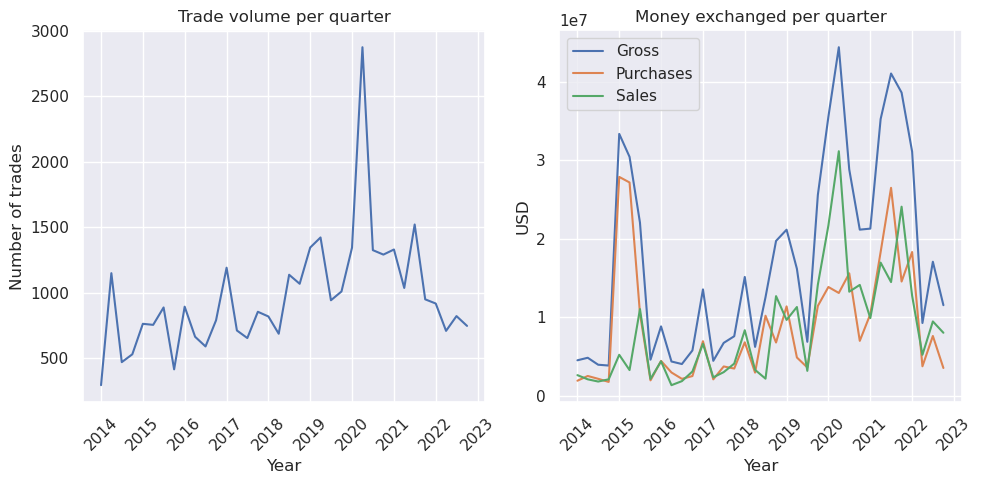

In [5]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(train.groupby("Quarter").count()["Traded"], ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of trades")
axs[0].set_title("Trade volume per quarter")
axs[0].tick_params(axis="x", labelrotation=45)
sns.lineplot(train.groupby("Quarter")["Min_Trade_Size"].sum(), ax=axs[1], label="Gross")
sns.lineplot(train[train.Transaction == "Purchase"].groupby("Quarter")["Min_Trade_Size"].sum(), ax=axs[1], label="Purchases")
sns.lineplot(train[train.Transaction.str.startswith("Sale")].groupby("Quarter")["Min_Trade_Size"].sum(), ax=axs[1], label="Sales")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("USD")
# axs[1].set_yscale("log")
axs[1].set_title("Money exchanged per quarter");
axs[1].tick_params(axis="x", labelrotation=45)
plt.tight_layout();

## What issues do companies lobby?

In [6]:
import scripts.data_extraction
reload(scripts.data_extraction)
from scripts.data_extraction import issue_codes_for_company

big_tech = pd.DataFrame()
for company_name in ["Microsoft", "Apple", "Amazon", "Google"]:
    company_counts = issue_codes_for_company(company_name)
    company_counts["Company"] = company_name
    big_tech = pd.concat([big_tech, company_counts])
    big_tech.sort_values(by="issue_code", inplace=True)
    
    


These companies lobby a diverse range of issues, also differing significantly from company to company. 

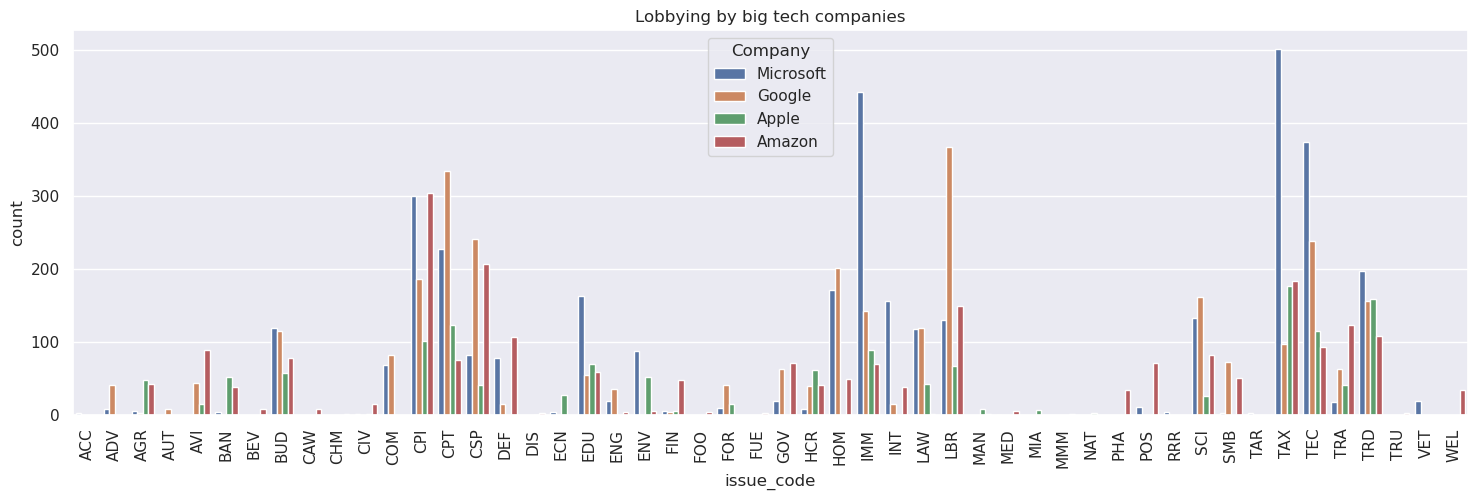

In [7]:
plt.figure(figsize=(18,5))
sns.barplot(big_tech, x="issue_code", y="count", hue="Company")
plt.title("Lobbying by big tech companies")
plt.xticks(rotation=90);

For Exxon Mobil, we see a lot of lobbying for ENG (Energy/Nuclear), more so than FUE (Fuel/Gas/Oil). But the biggest issue is taxation!

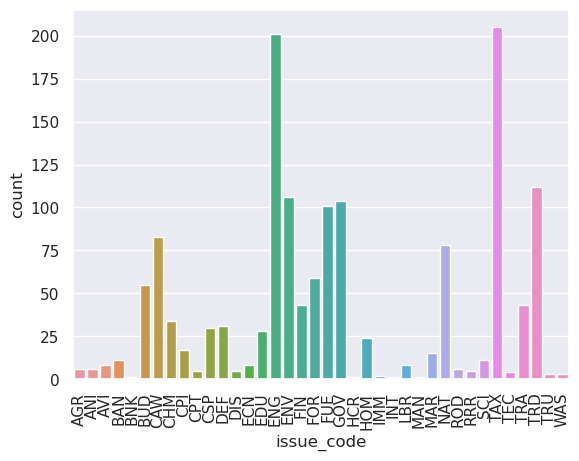

In [101]:
sns.barplot(issue_codes_for_company("Exxon Mobil"), x="issue_code", y="count")
plt.xticks(rotation=90);

## Comparing trading and lobbying

We'll examine the issue codes for which there's a very clear relation to one or more stock categories. To control for external effects on stock trading as a whole (there is both a gradual upward trend in trade volume, and a large spike in 2020 due to COVID), we'll also normalize the trading data by dividing by the quarterly trading gross, totaled across all stock categories.

In [35]:
from scripts.data_extraction import stock_and_lobbying_totals
from scripts.visualization import plot_lobbying_vs_stocks


In [72]:
issue_codes = "ADV"
stock_cats = "Advertising Agencies"
category_name = "Advertising"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

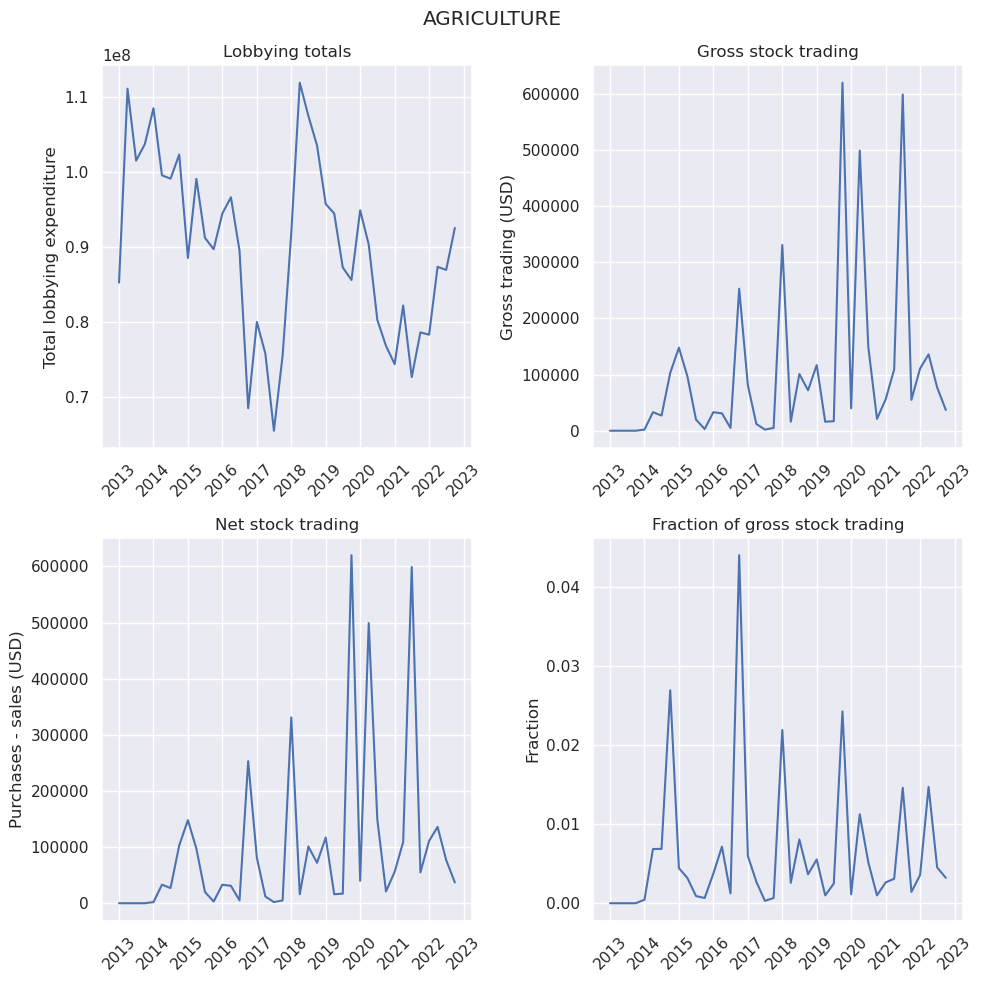

In [73]:
issue_codes = "AGR"
stock_cats = ["Agricultural Inputs", "Farm & Heavy Construction Machinery", "Farm Products"]
category_name = "Agriculture"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

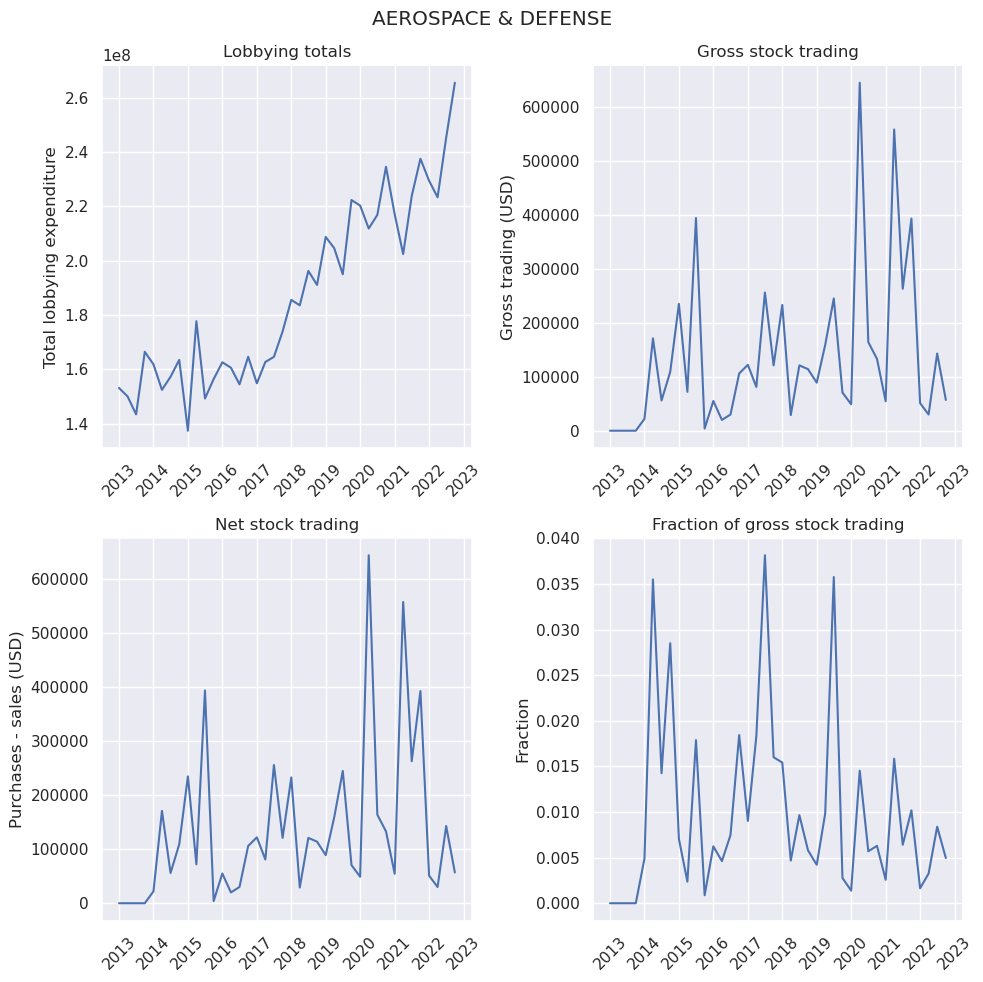

In [74]:
issue_codes = ["AER", "DEF"]
stock_cats = "Aerospace & Defense"
category_name = "Aerospace & Defense"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

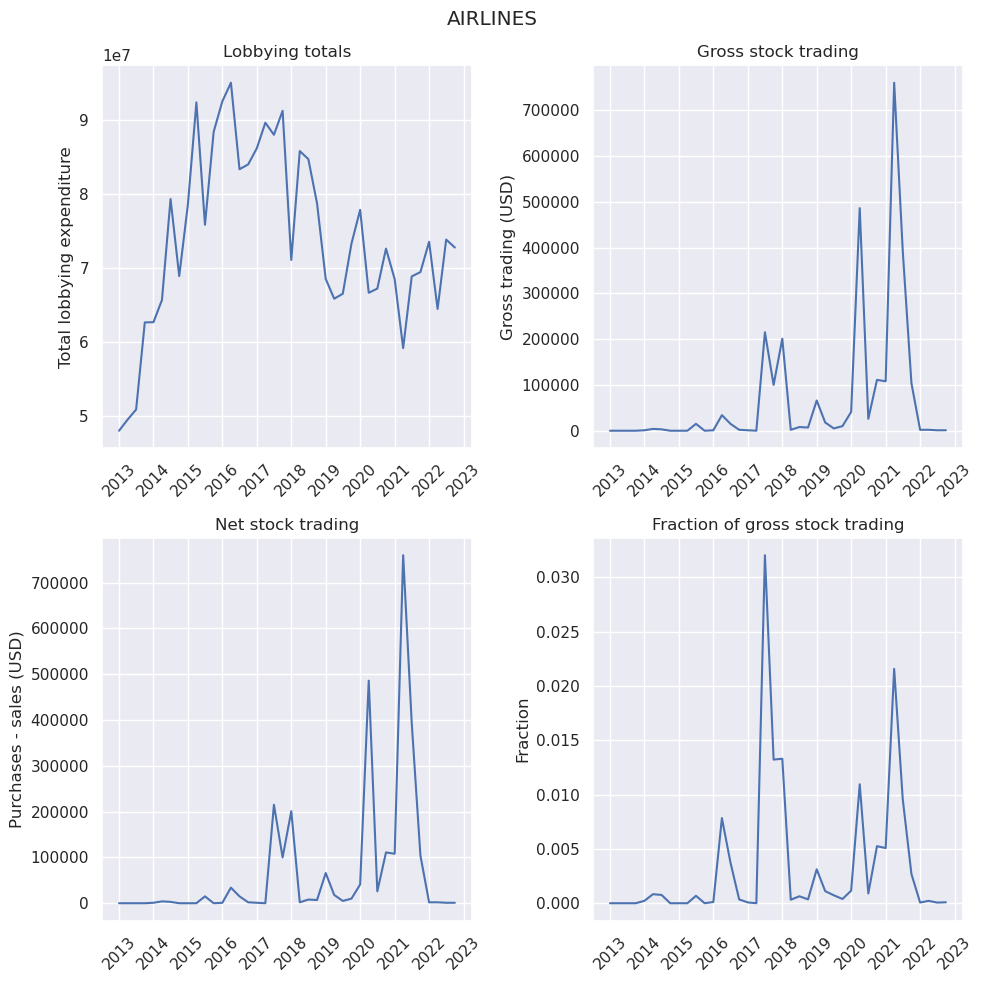

In [75]:
issue_codes = ["AVI"]
stock_cats = ["Airlines", "Airports & Air Services"]
category_name = "Airlines"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

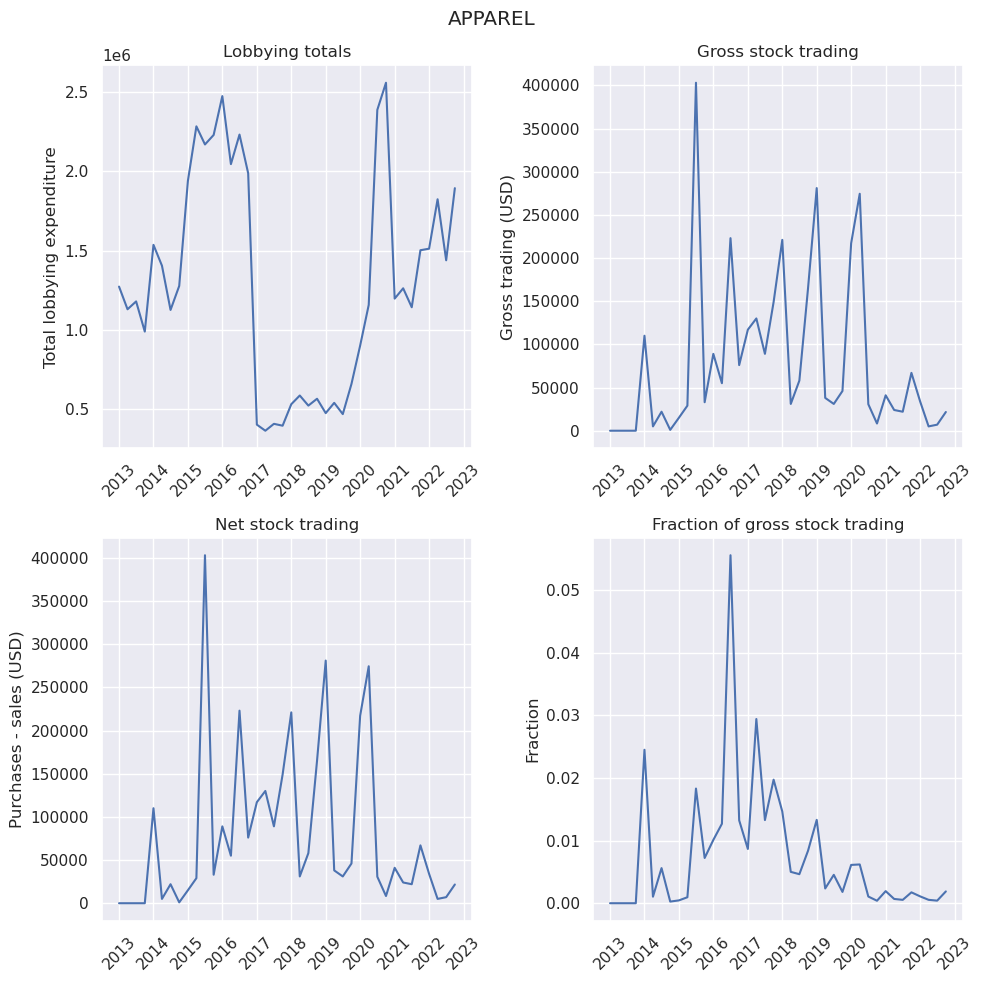

In [76]:
issue_codes = "APP"
stock_cats = ["Apparel Manufacturing", "Apparel Retail", "Footwear and Accessories", "Luxury Goods"]
category_name = "Apparel"

plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

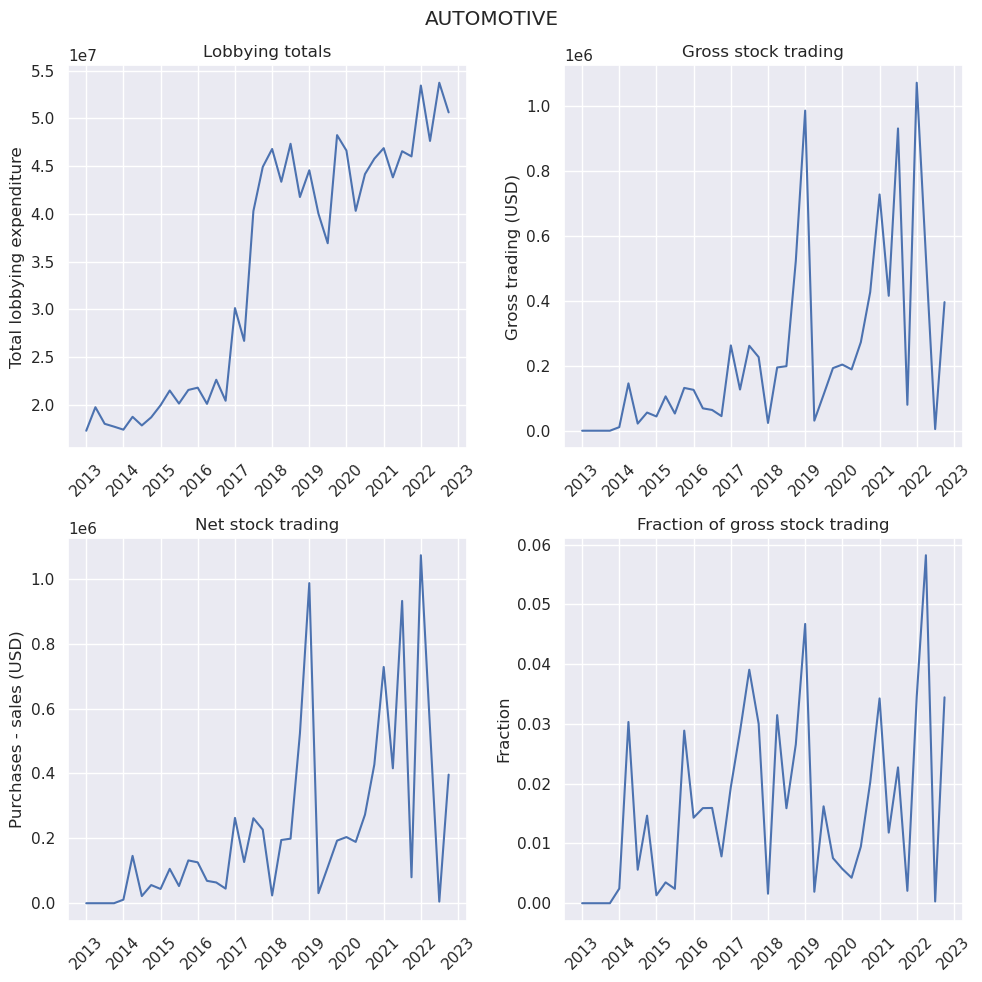

In [77]:
issue_codes = "AUT"
stock_cats = ["Auto & Truck Dealerships", "Auto Manufacturers", "Auto Parts", "Recreational Vehicles"]
category_name = "Automotive"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

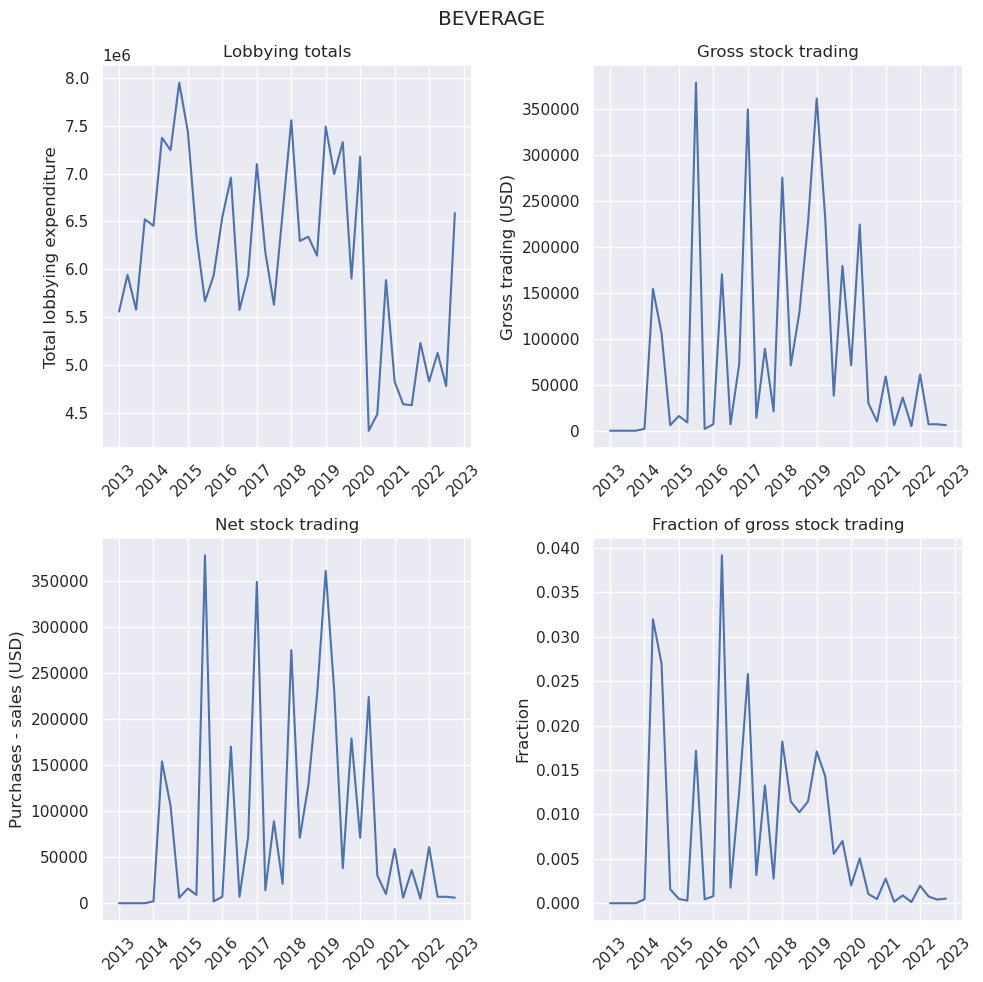

In [79]:
issue_codes = "BEV"
stock_cats = ["Beverages - Brewers", "Beverages - Non-Alcoholic", "Wineries and Distilleries"]
category_name = "Beverage"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

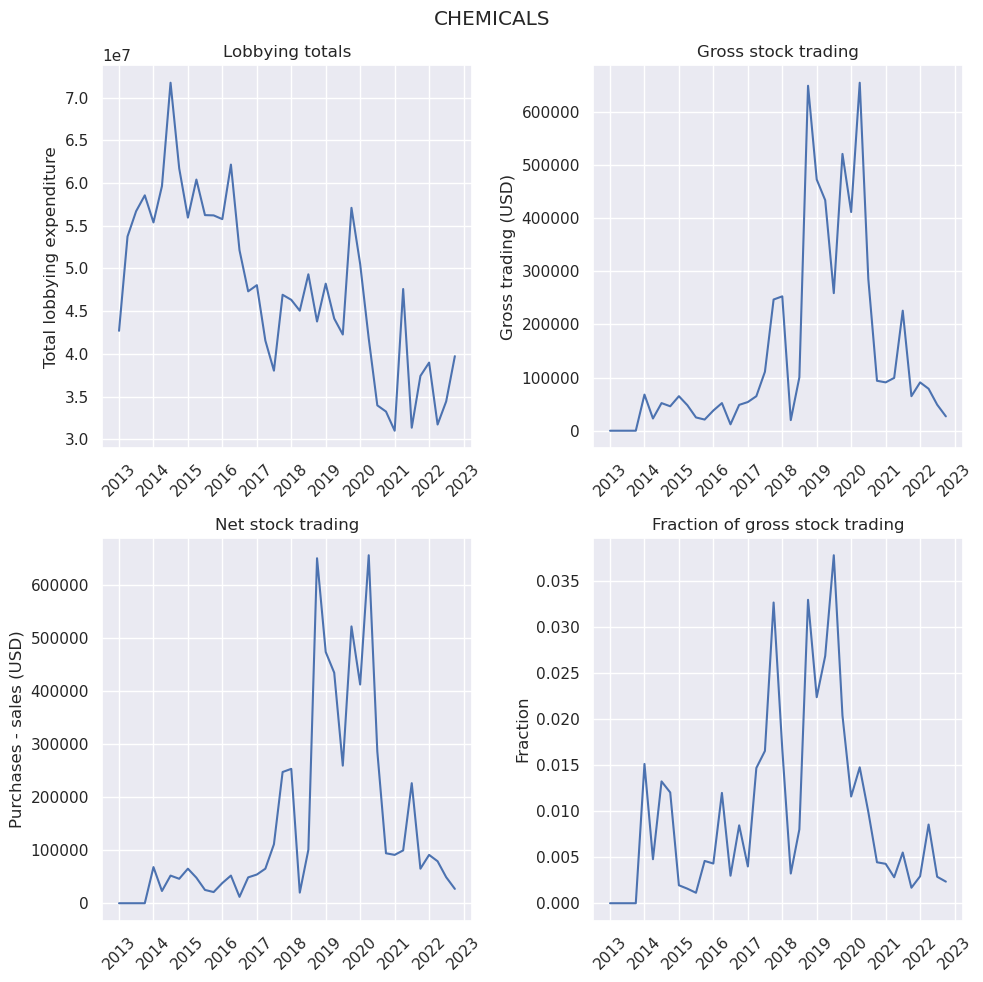

In [80]:
issue_codes = "CHM"
stock_cats = ["Chemicals", "Specialty Chemicals"]
category_name = "Chemicals"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

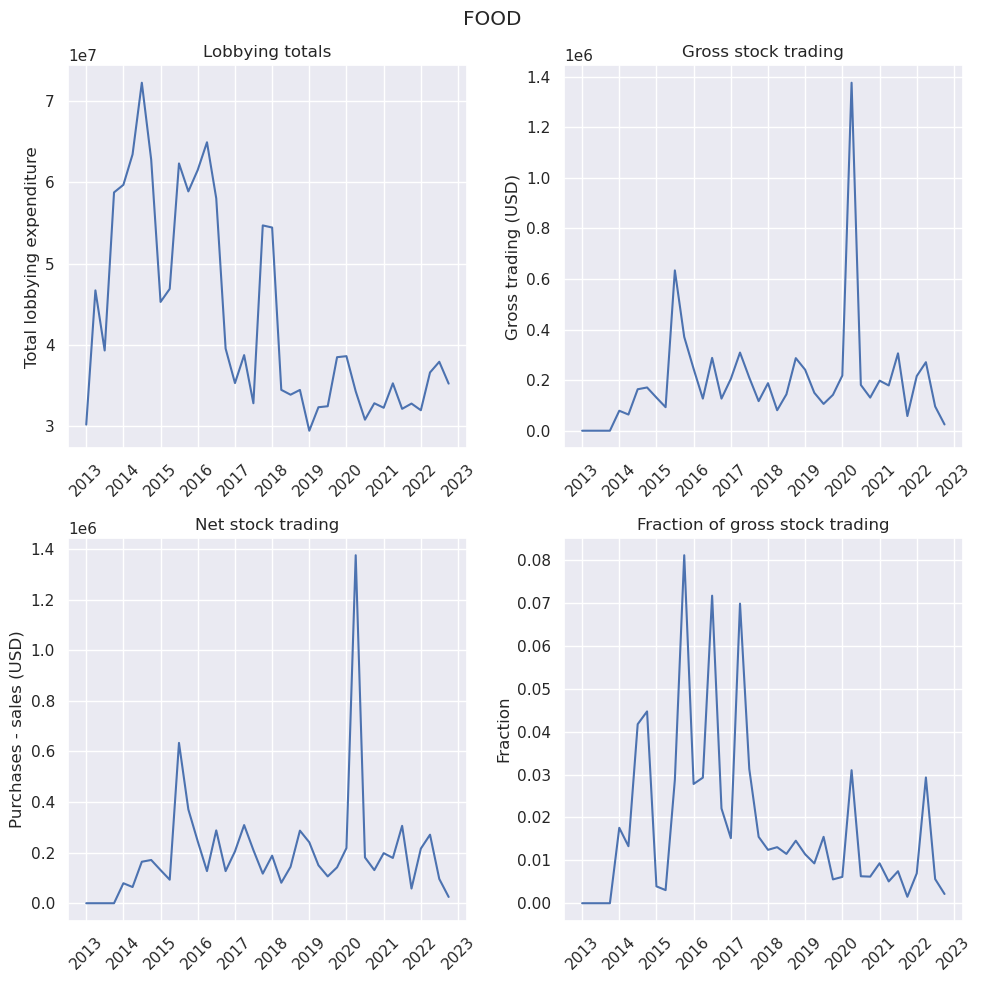

In [81]:
issue_codes = "FOO"
stock_cats = ["Confectioners", "Food Distribution", "Grocery Stores", "Packaged Foods", "Restaurants"]
category_name = "Food"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

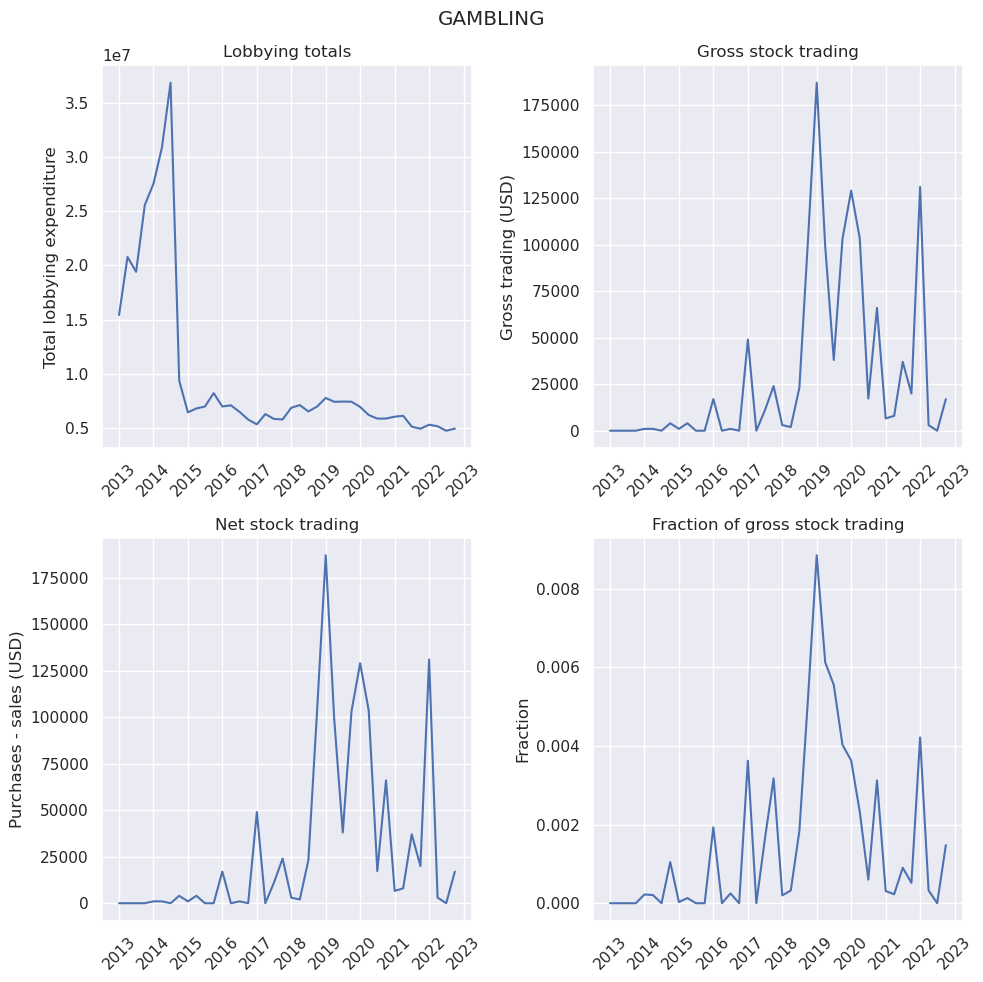

In [82]:
issue_codes = "GAM"
stock_cats = ["Gambling", "Resorts & Casinos"]
category_name = "Gambling"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

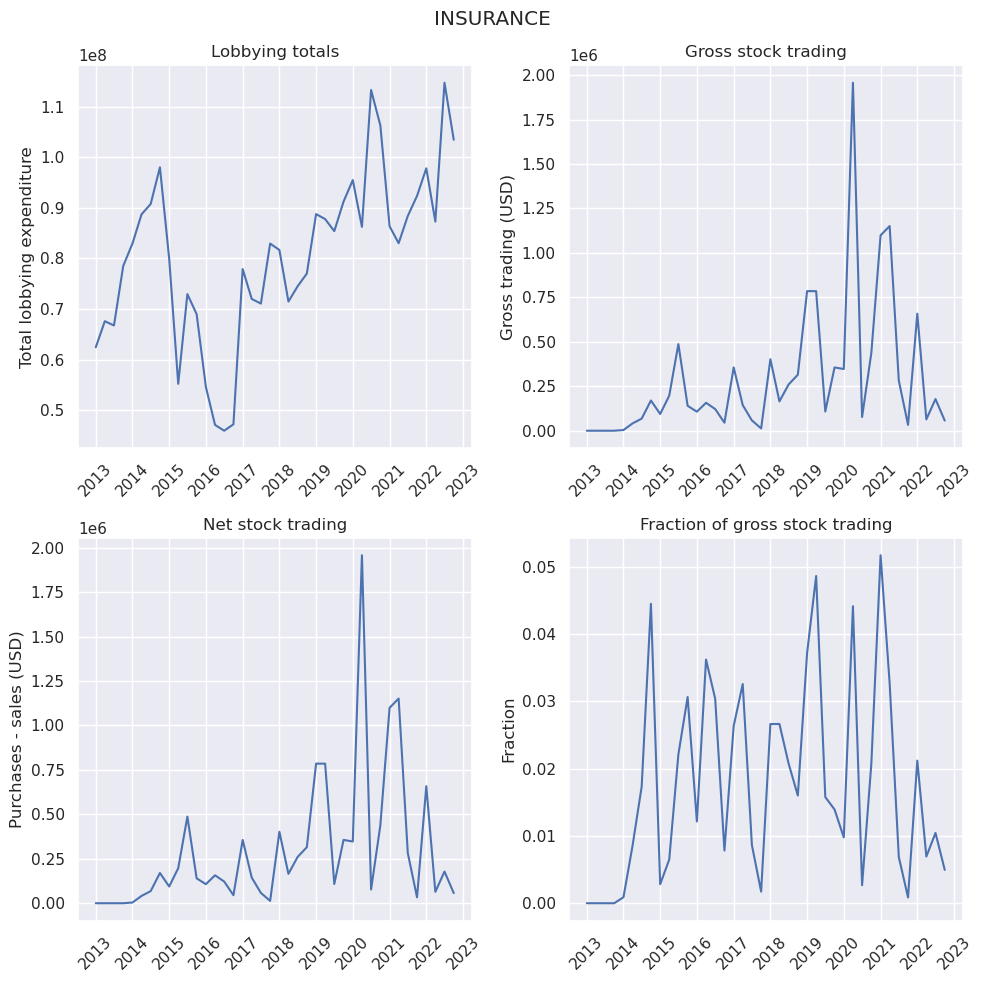

In [84]:
issue_codes = "INS"
stock_cats = ['Insurance - Life', 'Insurance - Property & Casualty',
       'Insurance - Diversified', 'Insurance Brokers',
       'Insurance - Specialty', 'Insurance - Reinsurance']
category_name = "Insurance"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

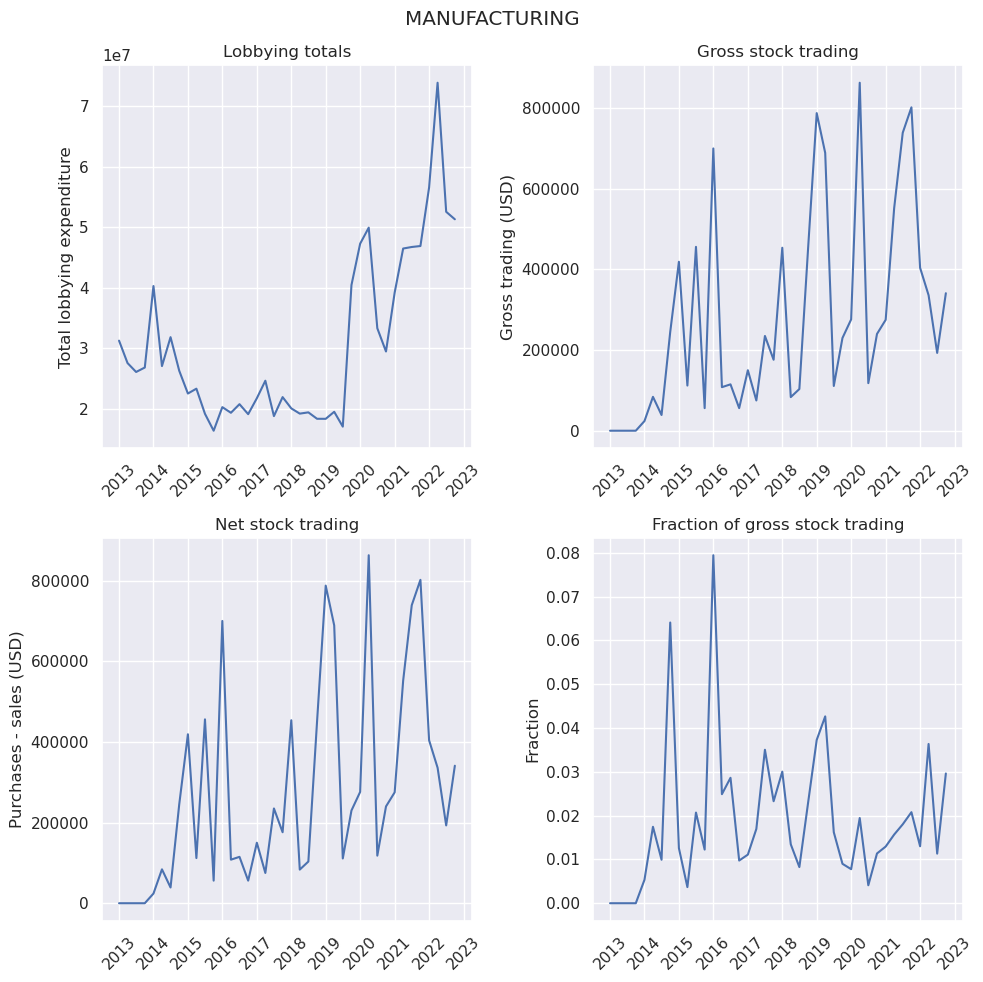

In [85]:
issue_codes = "MAN"
stock_cats = ["Metal Fabrication", "Specialty Industrial Machinery", "Steel", "Textile Manufacturing"]
category_name = "Manufacturing"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

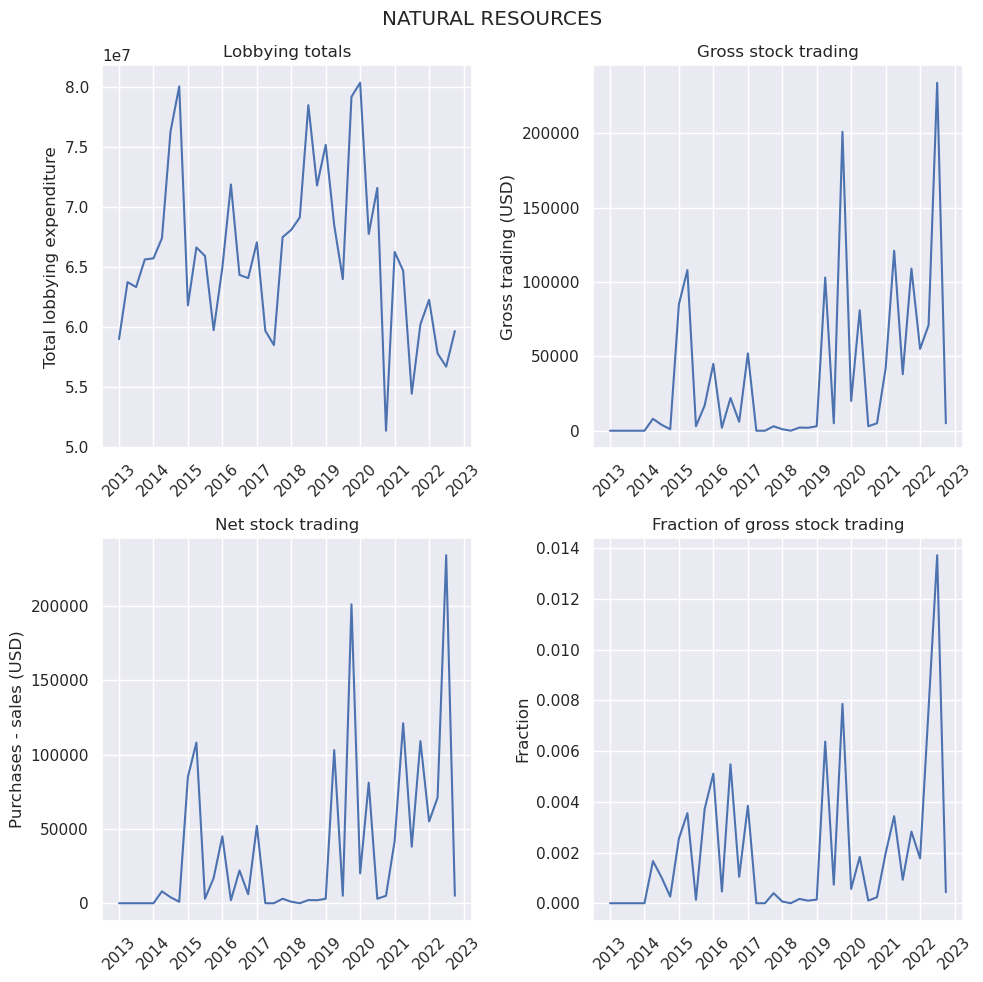

In [86]:
issue_codes = "NAT"
stock_cats = ["Aluminum", "Coking Coal", "Copper", "Gold", "Lumber & Wood Production", "Other Industrial Metals & Mining",
              "Other Precious Metals & Mining", "Silver", "Uranium"]
category_name = "Natural Resources"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)


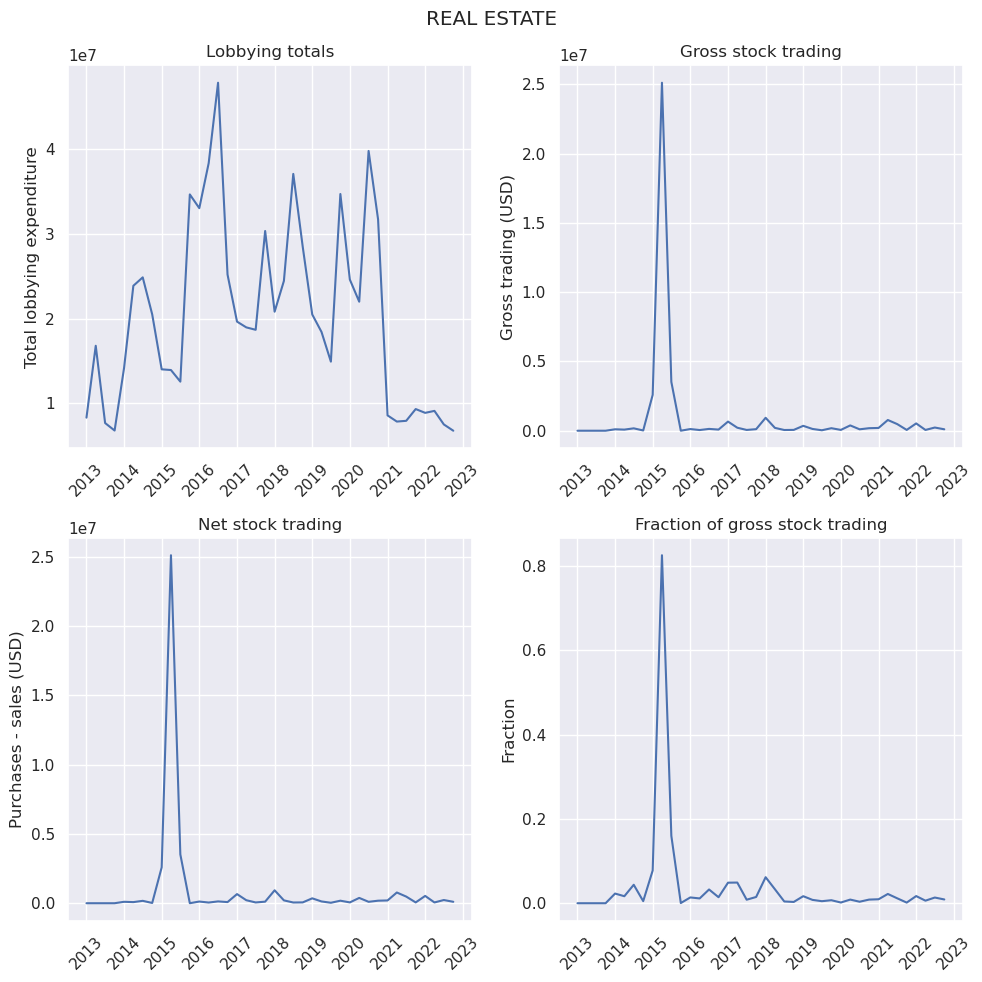

In [89]:
issue_codes = "RES"
stock_cats = ['Real Estate Services', 'Real Estate - Development',
       'Real Estate - Diversified', 'REIT - Specialty', 'REIT - Healthcare Facilities',
       'REIT - Mortgage', 'REIT - Retail', 'REIT - Office',
       'REIT - Residential', 'REIT - Diversified', 'REIT - Industrial',
       'REIT - Hotel & Motel', 'REIT - Mortgate']
category_name = "Real Estate"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)


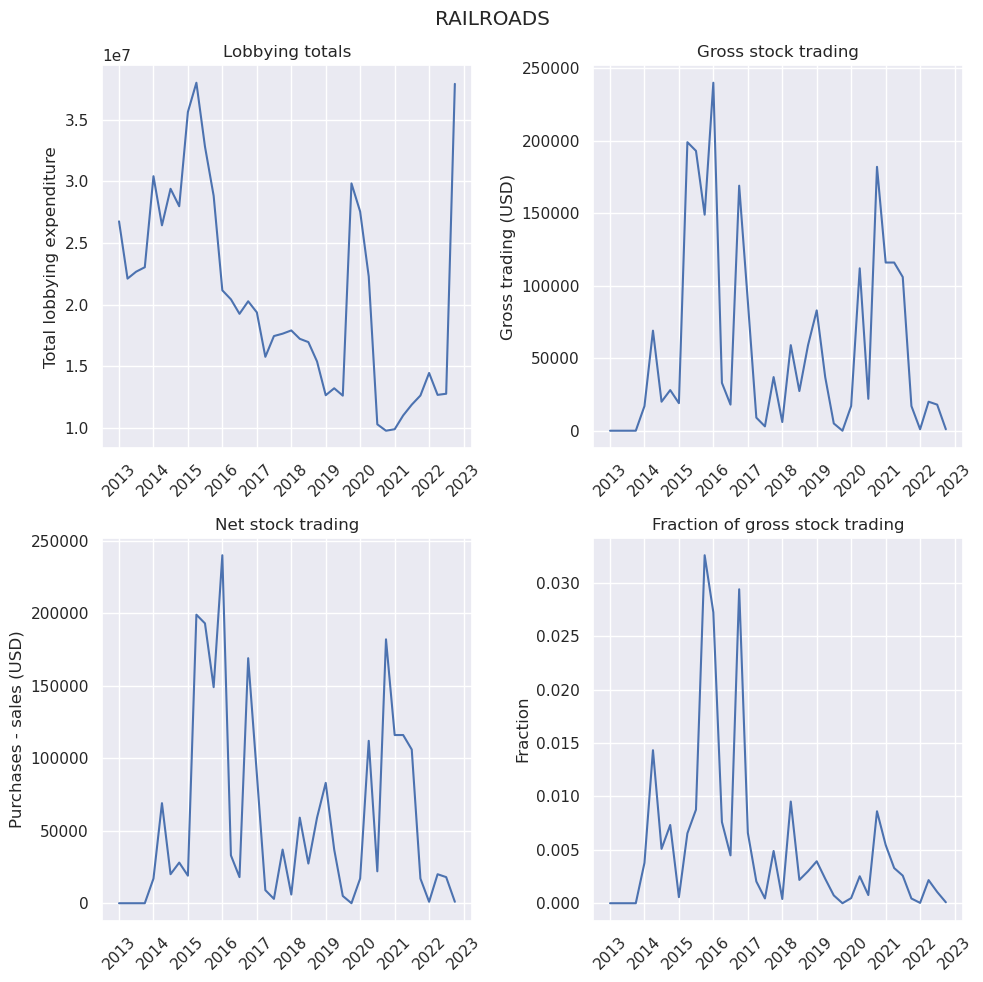

In [90]:
issue_codes = "RRR"
stock_cats = "Railroads"
category_name = "Railroads"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

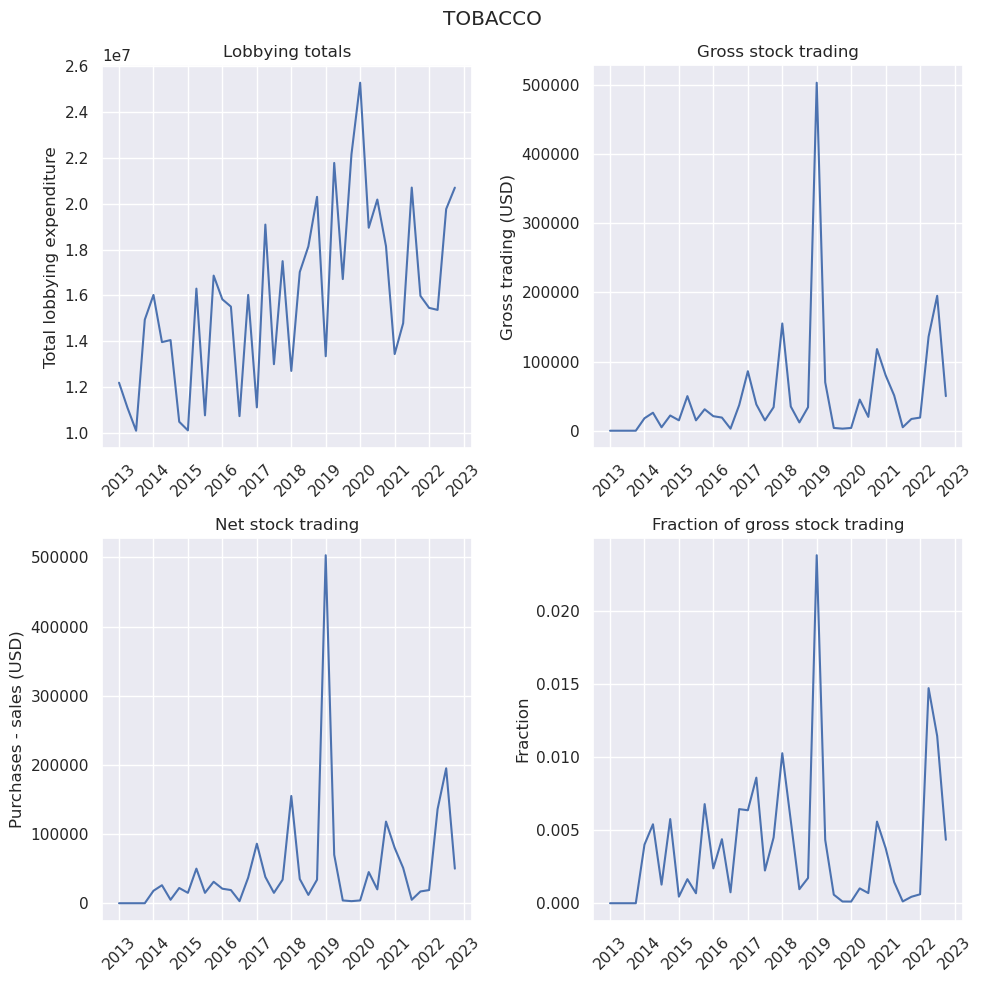

In [91]:
issue_codes = "TOB"
stock_cats = "Tobacco"
category_name = "Tobacco"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

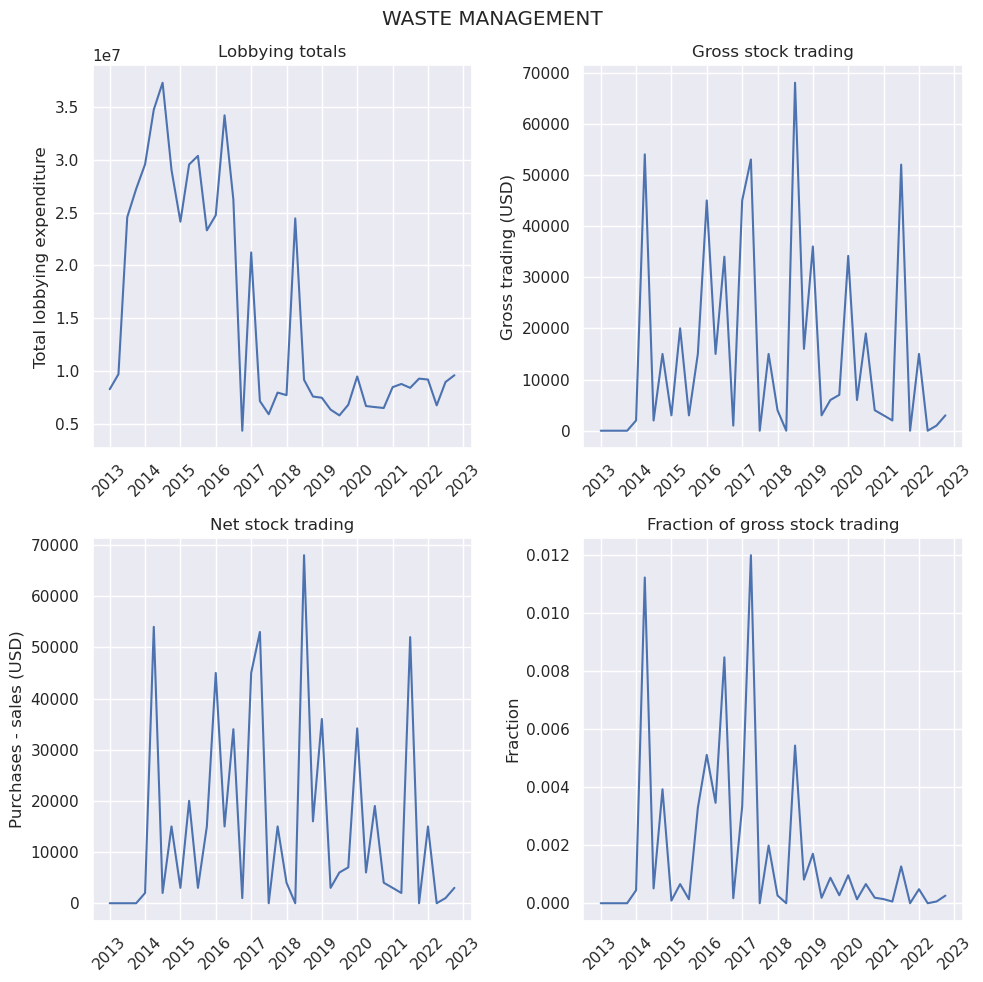

In [92]:
issue_codes = "WAS"
stock_cats = ["Pollution & Treatment Controls", "Waste Management"]
category_name = "Waste Management"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

## Adjustment for number of lobbying codes

Occasionally, a lobbying code which sees little activity gets a large spike from a major lobbying activity that extends over many codes. As an example of this phenomenon, consider the lobbying codes APP (Apparel/Textiles) and TRD (Trade). TRD sees an order of magnitude more lobbying than APP:

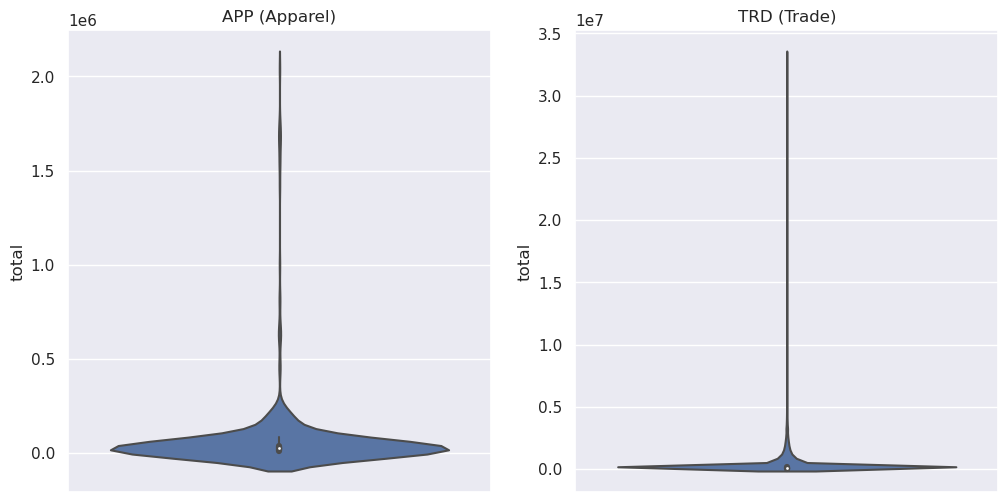

In [24]:
apparel_lobbying = pd.read_csv("lobbying_data/by_issue_code/filings_APP.csv", parse_dates=["period_start"])
apparel_lobbying["total"] = apparel_lobbying["income"] + apparel_lobbying["expenses"]
trade_lobbying = pd.read_csv("lobbying_data/by_issue_code/filings_TRD.csv", parse_dates=["period_start"])
trade_lobbying["total"] = trade_lobbying["income"] + trade_lobbying["expenses"]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(apparel_lobbying, y="total", ax=axs[0])
axs[0].set_title("APP (Apparel)")
sns.violinplot(trade_lobbying, y="total", ax=axs[1])
axs[1].set_title("TRD (Trade)");
# apparel_lobbying.total.hist(bins=20, ax=axs[0])
# trade_lobbying.total.hist(bins=20, ax=axs[1])

Thus when organizations lobby for both codes, the expenditure can be normal for TRD but highly unusual for APP:

In [18]:
apparel_lobbying.sort_values(by="total", ascending=False)[["registrant", "client", "total", "issue_codes"]].head()

registrant                      client      total  \
254  NATIONAL RETAIL FEDERATION  NATIONAL RETAIL FEDERATION  2040000.0   
293  NATIONAL RETAIL FEDERATION  NATIONAL RETAIL FEDERATION  1760000.0   
241  NATIONAL RETAIL FEDERATION  NATIONAL RETAIL FEDERATION  1720000.0   
223  NATIONAL RETAIL FEDERATION  NATIONAL RETAIL FEDERATION  1700000.0   
276  NATIONAL RETAIL FEDERATION  NATIONAL RETAIL FEDERATION  1680000.0   

                                                                                            issue_codes  
254         ['TRD', 'POS', 'BAN', 'TRA', 'TAX', 'HCR', 'ENV', 'CSP', 'APP', 'LBR', 'HOM', 'SCI', 'LAW']  
293         ['LAW', 'POS', 'APP', 'GOV', 'TRD', 'BAN', 'TRA', 'TAX', 'HCR', 'ENV', 'CSP', 'LBR', 'SCI']  
241         ['POS', 'APP', 'TRD', 'BAN', 'TRA', 'TAX', 'HCR', 'ENV', 'CSP', 'LBR', 'HOM', 'SCI', 'LAW']  
223         ['APP', 'ENV', 'TRD', 'BAN', 'TRA', 'TAX', 'HCR', 'POS', 'HOM', 'CSP', 'LBR', 'SCI', 'LAW']  
276  ['LAW', 'HOM', 'POS', 'GOV', 'ENV', 'APP', 'TRD', 'BAN', 'TRA', 'TAX', 'HCR', 'CSP', 'LBR', 'SCI']

Note that many different issue codes are lobbied for each of these cases. Here's the summary of the top expenditure for APP, where we can see that the lobbyist is indeed discussing a wide range of issues.

In [25]:
from scripts.data_extraction import print_lobbying_summary
print_lobbying_summary(apparel_lobbying.sort_values(by="total", ascending=False).iloc[0])

2016-01-01
Registrant:  NATIONAL RETAIL FEDERATION
Client:  NATIONAL RETAIL FEDERATION
Issue codes lobbied:  TRD, POS, BAN, TRA, TAX, HCR, ENV, CSP, APP, LBR, HOM, SCI, LAW
Expenses:  2040000.0
Transpacific Partnership Agreement -- support, communicate retail views.
Implementation of the Trade Facilitation and Trade Enforcement Act, communicate retail views.

U.S. Postal Service Reform - communication of retail industry views.

Update House and Senate on Interchange/swipe fee reform issues, including pending surcharge legislation in states; provide retailers' perspective of issues in implementing mobile payment systems; data security and breach notification as it relates to sensitive financial data; cybersecurity information sharing issues; S. 1484, Financial Regulatory Improvement Act of 2015, indexing threshhold of electronic funds transfer amendment to Dodd-Frank; appropriations language pertaining to threshold EFTA amendment; S. 1491, Community Financial Institution Regulatory Reli

A crude way to correct for this phenomenon is to assume that lobbyist money spent is *equally* divided across *all* the issue codes lobbied. Thus, the above expenditure of \\$2,040,000 across 13 lobbying codes would translate to ~\\$150,000 per code. The following utility function performs this normalization.

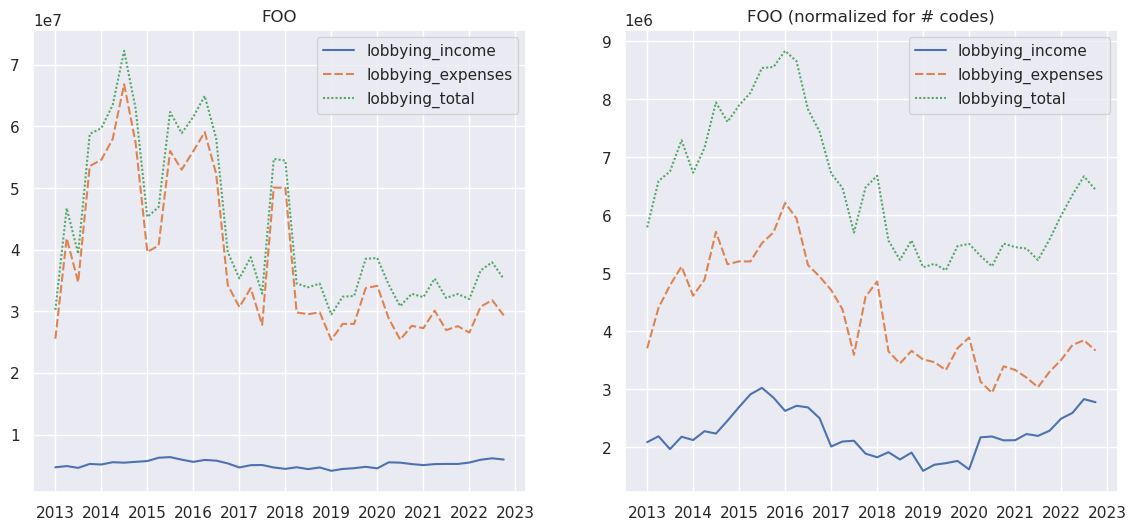

In [52]:
from scripts.data_extraction import lobbying_totals

def plot_adjustment_effect(code):
    unadjusted = lobbying_totals(code, adjust_for_num_codes=False)
    adjusted = lobbying_totals(code, adjust_for_num_codes=True)
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    sns.lineplot(unadjusted, ax=axs[0])
    axs[0].set_title(code)
    sns.lineplot(adjusted, ax=axs[1])
    axs[1].set_title(f"{code} (normalized for # codes)");

plot_adjustment_effect("FOO")

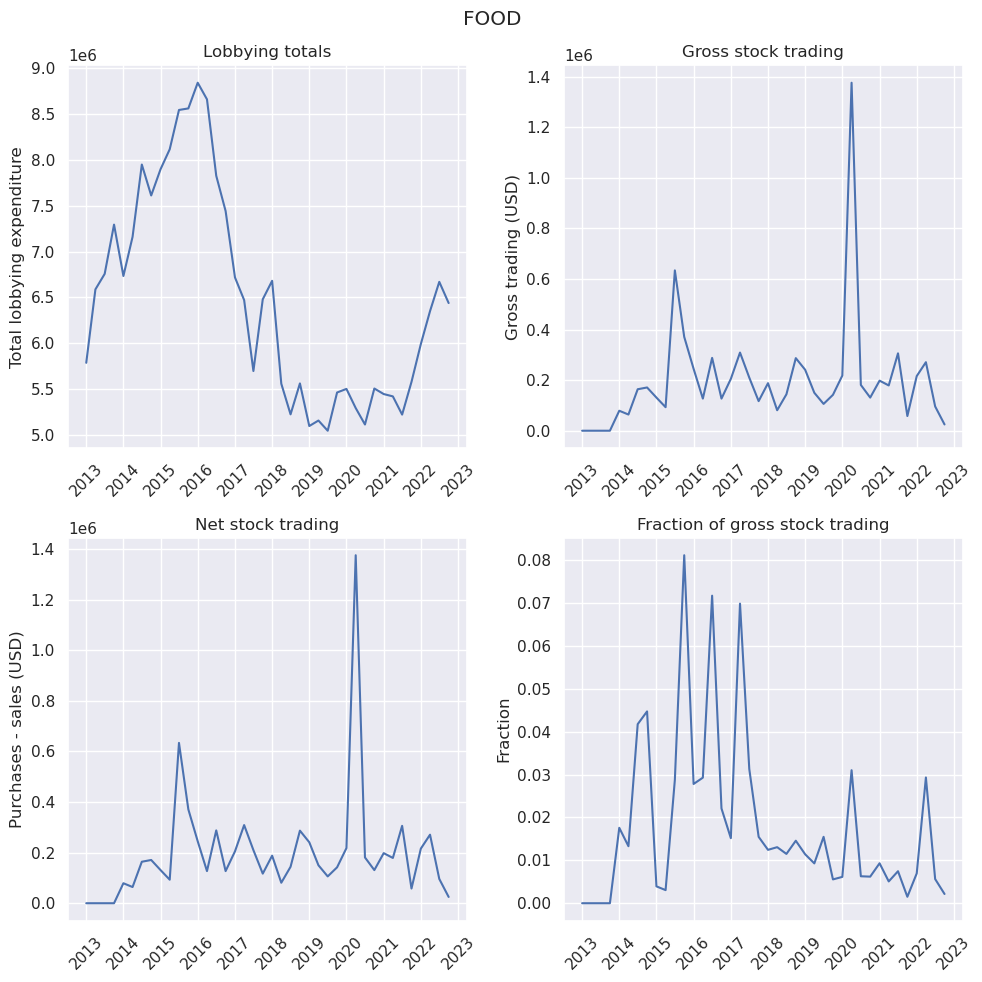

In [53]:
from scripts.visualization import plot_lobbying_vs_stocks

issue_codes = "FOO"
stock_cats = ["Confectioners", "Food Distribution", "Grocery Stores", "Packaged Foods", "Restaurants"]
category_name = "Food"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name, adjust_for_num_codes=True)


<Axes: ylabel='stocks_gross_frac'>

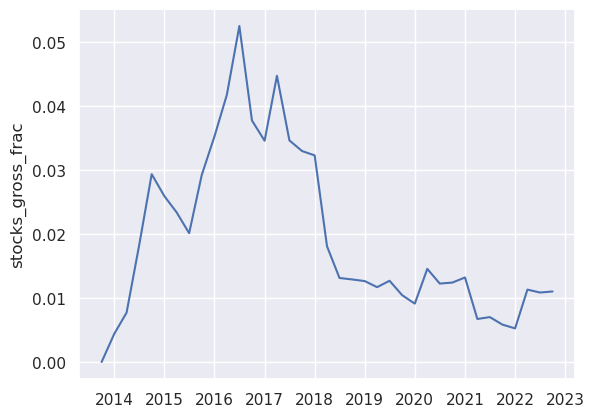

In [56]:
from scripts.data_extraction import stock_totals
foo_stocks = stock_totals(stock_cats)

sns.lineplot(foo_stocks.stocks_gross_frac.rolling(4).mean())

Text(0.5, 1.0, "['Apparel Manufacturing', 'Apparel Retail', 'Footwear and Accessories', 'Luxury Goods']")

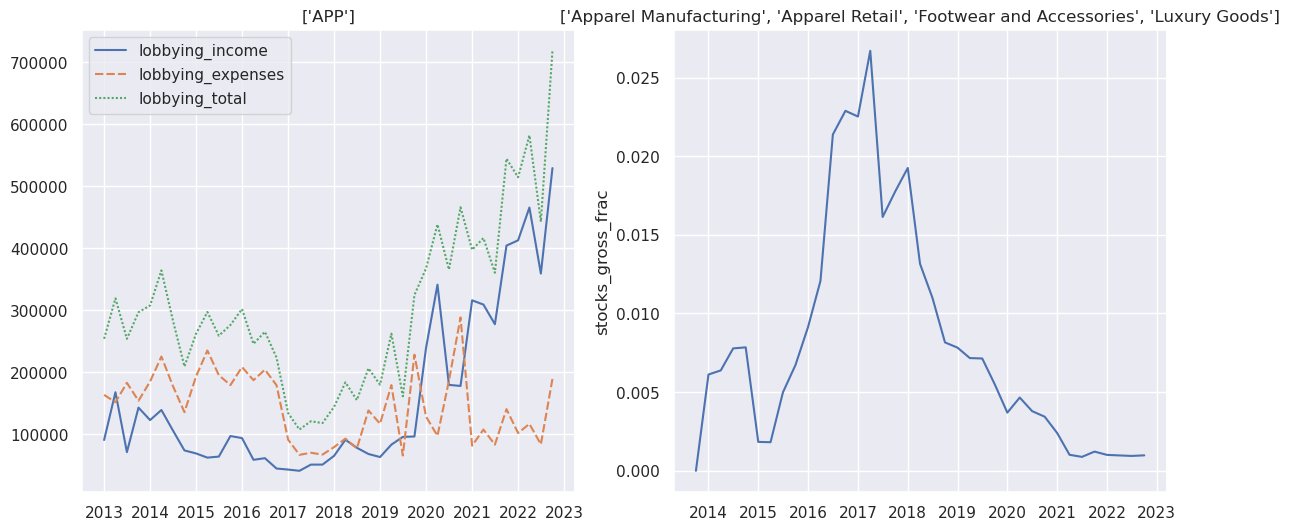

In [69]:
code2sector = pd.read_csv("trading_data/lobbyingcode2sector.csv", quotechar="'")
code2sector = code2sector.applymap(eval)

idx = 4
idx_stocks = stock_totals(code2sector.loc[idx, "industries"])
idx_lobby = lobbying_totals(code2sector.loc[idx, "codes"], adjust_for_num_codes=True)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.lineplot(idx_lobby, ax=axs[0])
axs[0].set_title(code2sector.loc[idx, "codes"])
sns.lineplot(idx_stocks.stocks_gross_frac.rolling(4).mean(), ax=axs[1])
axs[1].set_title(code2sector.loc[idx, "industries"])

## Are the stock trades white noise?

Most of the trading graphs show little obvious structure.  Since "stocks" is a 

In [71]:
from scripts.data_extraction import get_all_lobbying_data
all_lobbying = get_all_lobbying_data()

<Axes: xlabel='period_start', ylabel='registrant'>

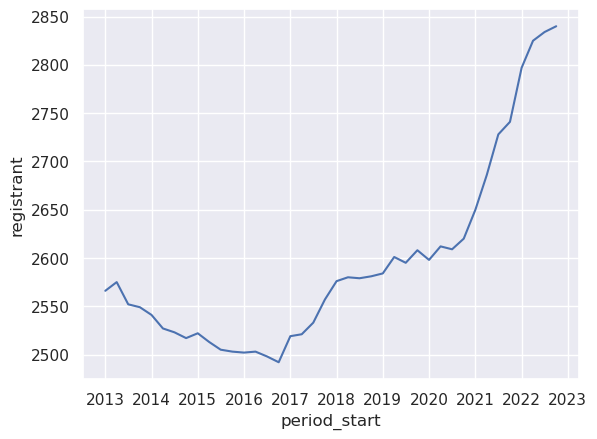

In [80]:
sns.lineplot(all_lobbying[all_lobbying.expenses > 0].groupby("period_start")["registrant"].nunique())

In [82]:
sns.lineplot(all_lobbying[all_lobbying.income > 0].groupby("period_start")["client"].count())


<Axes: xlabel='period_start', ylabel='client'>

In [90]:
all_lobbying[all_lobbying.expenses > 0].registrant.value_counts()

registrant
ULTRA ELECTRONICS DEFENSE INC                                                       60
MARKQUEST                                                                           42
PROENGLISH, A PROJECT OF U.S. INC.                                                  41
AMERICA'S HEALTH INSURANCE PLANS, INC. (AHIP)                                       40
THE PENNSYLVANIA STATE UNIVERSITY                                                   40
                                                                                    ..
ACCURAY INCORPORATED                                                                 1
EMCOR GROUP, INC.                                                                    1
SYLVAN LEARNING, INC. (FORMERLY LOBBIED UNDER THE REGISTRATION OF EDUCATE, INC.)     1
NAU COUNTRY INSURANCE COMPANY                                                        1
RAILWAY ENGINEERING MAINTENANCE SUPPLIERS ASSOCIATION                                1
Name: count, Length: 3984, dtype

In [92]:
sns.lineplot(all_lobbying[all_lobbying.registrant.str.contains("Pennsylvania State", case=False)].groupby("period_start").client.count())

<Axes: xlabel='period_start', ylabel='client'>

In [100]:
print("\n\n".join(eval(all_lobbying[all_lobbying.registrant.str.contains("Pennsylvania State", case=False)].iloc[0].lobbying_description)))

Defense Appropriations Act - Title IV - In support of increased funding for Defense Science and Technology, and Basic and Applied Research in all services; in support of funding for Force Protection Applied Research; in support of funding for Surface Ship Torpedo Defense; in support of funding for Penn State Cancer Institute research initiative; in support of Navy Undersea Warfare Applied Research funding; in support of Navy Advanced Submarine System Development funding; in support of Navy Industrial Preparedness funding; in support of Navy Cooperative Engagement funding.

Agriculture, Rural Development, Food and Drug Administration and Related Agencies Appropriation - Title I - Cooperative State Research, Education and Extension Service - increased funding for Hatch Act, Smith-Lever, Agriculture and Food Research Initiative.  In support of extramural research grant funding.

In support of language authorizing Ag Policy research centers.

In support of funding for University Transporta

In [9]:
from scripts.data_extraction import get_all_lobbying_data
all_lobbying = get_all_lobbying_data()

Text(0.5, 1.0, 'Lobbying totals: Amazon')

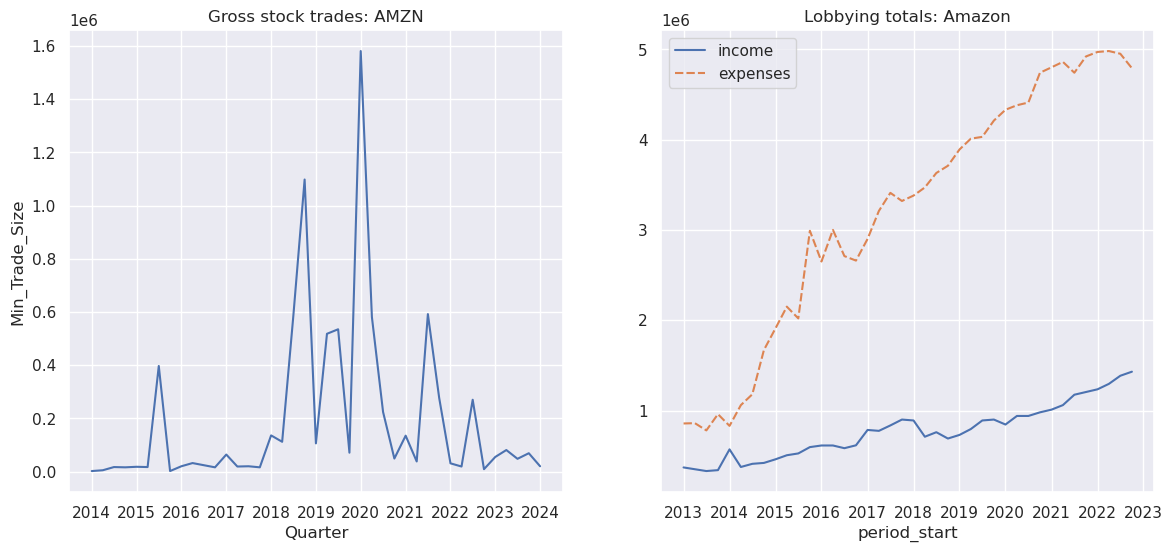

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sym, name = "AMZN", "Amazon"
sns.lineplot(stocks[stocks.Ticker == sym].groupby("Quarter")["Min_Trade_Size"].sum(), ax=axs[0])
axs[0].set_title(f"Gross stock trades: {sym}")
sns.lineplot(
    all_lobbying[all_lobbying.client.str.contains(name, case=False)]
    .groupby("period_start")
    [["income", "expenses"]]
    .sum(),
    ax=axs[1]
)
axs[1].set_title(f"Lobbying totals: {name}")
